In [15]:
"""
Rhett Proctor
Caleb Bryant
Corey Rusher
CSC 535
Project
kmeans.ipynb
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize

In [16]:
#Database url
https://www.kaggle.com/jackogozaly/data-science-and-stem-salaries

#Get data
data0 = pd.read_csv("Levels_Fyi_Salary_Data.csv")
X = data0[["totalyearlycompensation", "yearsofexperience", "yearsatcompany", "basesalary", "stockgrantvalue","bonus", "cityid"]]

#Create clusters
cluster0 = []
cluster1 = []
cluster2 = []

X

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid
0,127000,1.5,1.5,107000.0,20000.0,10000.0,7392
1,100000,5.0,3.0,0.0,0.0,0.0,7419
2,310000,8.0,0.0,155000.0,0.0,0.0,11527
3,372000,7.0,5.0,157000.0,180000.0,35000.0,7472
4,157000,5.0,3.0,0.0,0.0,0.0,7322
...,...,...,...,...,...,...,...
62637,327000,10.0,1.0,155000.0,150000.0,22000.0,11527
62638,237000,2.0,2.0,146900.0,73200.0,16000.0,11521
62639,220000,14.0,12.0,157000.0,25000.0,20000.0,11527
62640,280000,8.0,4.0,194688.0,57000.0,29000.0,7419


In [17]:
# Scaling the data so that all the features become comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
  
# Normalizing the data so that the data approximately 
# follows a Gaussian distribution
X_normalized = normalize(X_scaled)
X_normalized

array([[-0.44145947, -0.66645661, -0.25133708, ..., -0.26241727,
        -0.2378449 , -0.25175662],
       [-0.32142297, -0.14397216,  0.03482231, ..., -0.23989538,
        -0.27541529, -0.13920485],
       [ 0.45425273,  0.09118923, -0.55403975, ..., -0.42080973,
        -0.48311656,  0.16739816],
       ...,
       [ 0.0085843 ,  0.37268005,  0.91245835, ..., -0.1036098 ,
         0.00795587,  0.08011943],
       [ 0.37056685,  0.10942424,  0.31934066, ...,  0.05407871,
         0.28979886, -0.29301391],
       [-0.07428614, -0.7759551 , -0.52082457, ..., -0.18813333,
        -0.00786285, -0.22455375]])

In [18]:
#Dimension reduction with Principal Component Analysis
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

#Add cluster label column
X_principal['cluster'] = -1 
X_principal

,P1,P2,cluster
0,-0.796513,-0.087838,-1
1,-0.602239,0.499224,-1
2,0.060437,-0.243850,-1
3,0.876227,-0.250253,-1
4,-0.556485,0.465557,-1
...,...,...,...
62637,0.808174,-0.446199,-1
62638,-0.178049,-0.666884,-1
62639,0.640403,0.802244,-1
62640,0.907842,-0.167452,-1


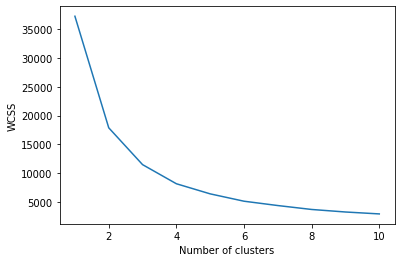

In [19]:
#Elbow graph for optimal k value
from sklearn.cluster import KMeans  #Only used for this model
wcss = [] 
for i in range(1, 11): 
    k_means = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    k_means.fit(X_principal) 
    wcss.append(k_means.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()
#3 is optimal value of k

In [20]:
#Original plot function
def original_plot(data):
    plt.scatter(data['P1'], data["P2"], color="palegreen")
    plt.title("Original Dataset")
    plt.xlabel('x value')
    plt.ylabel('y value')
    plt.show()

In [21]:
#Initial k plot function
def initial_k_plot(data, means):
    plt.scatter(data["P1"], data["P2"], color="plum")
    plt.scatter(means.iloc[0,0],means.iloc[0,1], color = "red", marker = "*", s = 100)      #Cluster 0
    plt.scatter(means.iloc[1,0],means.iloc[1,1], color = "blue", marker = "*", s = 100)     #Cluster 1
    plt.scatter(means.iloc[2,0],means.iloc[2,1], color = "black", marker = "*", s = 100)    #Cluster 2
    plt.title("Initial k means")
    plt.xlabel('x value')
    plt.ylabel('y value')
    plt.show()

In [22]:
#Assign item function
def assign(data, means):
    for i in range(len(data)):

        #Calculate Euclidean distance from each mean
        distance1 = float((((data.iloc[i, 0] - means.iloc[0,0]) ** 2) + (data.iloc[i, 1] - means.iloc[0,1]) ** 2) ** 1/2)
        distance2= float((((data.iloc[i, 0] - means.iloc[1,0]) ** 2) + (data.iloc[i, 1] - means.iloc[1,1]) ** 2) ** 1/2)
        distance3 = float((((data.iloc[i, 0] - means.iloc[2,0]) ** 2) + (data.iloc[i, 1] - means.iloc[2,1]) ** 2) ** 1/2)

        #Assign items
        if (min(distance1, distance2, distance3, key=abs)) == distance1:        #Cluster 0
            cluster0.extend([data.iloc[i,0], data.iloc[i,1], data.iloc[i,2]])     
            data.iloc[i,-1] = 0    
        elif (min(distance1, distance2, distance3, key=abs)) == distance2:      #Cluster 1
            cluster1.extend([data.iloc[i,0], data.iloc[i,1], data.iloc[i,2]])     
            data.iloc[i,-1] = 1 
        else:                                                                   #Cluster 2
            cluster2.extend([data.iloc[i,0], data.iloc[i,1], data.iloc[i,2]])
            data.iloc[i,-1] = 2

In [23]:
#Update graph function
def update_graph(data, means):
    color = ['lightcoral' if value == 0 else 'skyblue' if value == 1 else 'palegreen' for value in data['cluster']]
    plt.scatter(data["P1"], data["P2"], color=color)
    plt.title("Updated Dataset")
    red_patch = mpatches.Patch(color='lightcoral', label='Cluster 0')
    blue_patch = mpatches.Patch(color='skyblue', label='Cluster 1')
    green_patch = mpatches.Patch(color='palegreen', label='Cluster 2')
    plt.scatter(means.iloc[0,0],means.iloc[0,1], color = "red", marker = "*", s = 100)
    plt.scatter(means.iloc[1,0],means.iloc[1,1], color = "blue", marker = "*", s = 100)
    plt.scatter(means.iloc[2,0],means.iloc[2,1], color = "black", marker = "*", s = 100)
    plt.xlabel('x value')
    plt.ylabel('y value')
    plt.legend(handles=[red_patch, blue_patch, green_patch])
    plt.show()

In [24]:
#Calculate mean of clusters and update function
def update_means(means):

    #Cluster 0
    x_sum0 = 0
    y_sum0 = 0
    count0 = 0
    for i in range(0, len(cluster0), 3):
        x_sum0 += cluster0[i]
        y_sum0 += cluster0[i+1]
        count0 += 1
    x_mean0 = x_sum0 / count0
    y_mean0 = y_sum0 / count0
    means.iloc[0,0] = x_mean0
    means.iloc[0,1] = y_mean0

    #Cluster 1
    x_sum1 = 0
    y_sum1 = 0
    count1 = 0
    for i in range(0, len(cluster1), 3):
        x_sum1 += cluster1[i]
        y_sum1 += cluster1[i+1]
        count1 += 1
    x_mean1 = x_sum1 / count1
    y_mean1 = y_sum1 / count1
    means.iloc[1,0] = x_mean1
    means.iloc[1,1] = y_mean1

    #Cluster 2
    x_sum2 = 0
    y_sum2 = 0
    count2 = 0
    for i in range(0, len(cluster2), 3):
        x_sum2 += cluster2[i]
        y_sum2 += cluster2[i+1]
        count2 += 1
    x_mean2 = x_sum2 / count2
    y_mean2 = y_sum2 / count2
    means.iloc[2,0] = x_mean2
    means.iloc[2,1] = y_mean2

In [25]:
#K-means algorithm function
def kmeans(data, k):
    
    #Plot original dataset
    original_plot(data)

    #Pick random initial k means
    np.random.seed(5)
    means = data.sample(k)

    #Initial k means plot
    initial_k_plot(data,means)
    print(data)

    #Loop counter
    count = 0

    #Loop until count is equal to 10
    while count != 10:
        #Assign each item to cluster
        assign(data, means)

        #Update means
        update_means(means)

        #Increment loop count
        count += 1
    
    #Plot updated dataset
    update_graph(data, means)
    print(data)

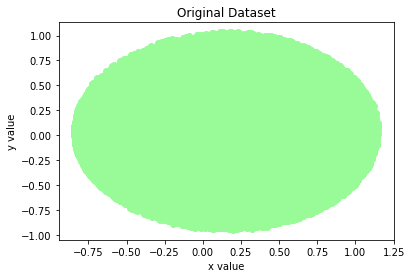

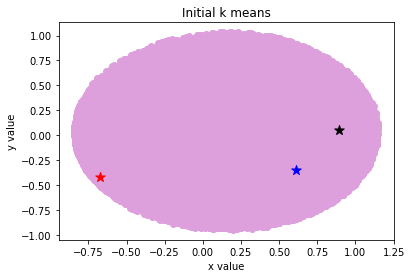

             P1        P2  cluster
0     -0.796513 -0.087838       -1
1     -0.602239  0.499224       -1
2      0.060437 -0.243850       -1
3      0.876227 -0.250253       -1
4     -0.556485  0.465557       -1
...         ...       ...      ...
62637  0.808174 -0.446199       -1
62638 -0.178049 -0.666884       -1
62639  0.640403  0.802244       -1
62640  0.907842 -0.167452       -1
62641 -0.447401 -0.673199       -1

[62642 rows x 3 columns]


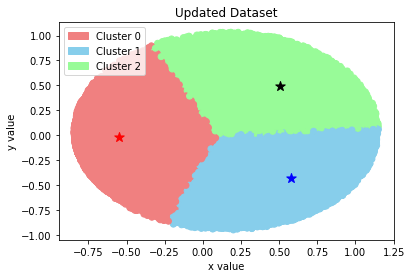

             P1        P2  cluster
0     -0.796513 -0.087838        0
1     -0.602239  0.499224        0
2      0.060437 -0.243850        1
3      0.876227 -0.250253        1
4     -0.556485  0.465557        0
...         ...       ...      ...
62637  0.808174 -0.446199        1
62638 -0.178049 -0.666884        0
62639  0.640403  0.802244        2
62640  0.907842 -0.167452        1
62641 -0.447401 -0.673199        0

[62642 rows x 3 columns]


In [26]:
kmeans(X_principal, k=3)

In [27]:
#Add cluster labels to original scaled data set
clusters = X_principal["cluster"]
X_scaled_clustered = pd.DataFrame(X_normalized, columns=X.columns, index=X.index)
X_scaled_clustered["cluster"] = clusters
X_scaled_clustered

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,cluster
0,-0.441459,-0.666457,-0.251337,-0.330098,-0.262417,-0.237845,-0.251757,0
1,-0.321423,-0.143972,0.034822,-0.849685,-0.239895,-0.275415,-0.139205,0
2,0.454253,0.091189,-0.554040,0.199686,-0.420810,-0.483117,0.167398,1
3,0.514197,-0.015933,0.320963,0.150884,0.715531,0.266645,-0.162724,1
4,-0.170394,-0.149685,0.036204,-0.883403,-0.249415,-0.286345,-0.150489,0
...,...,...,...,...,...,...,...,...
62637,0.483292,0.288486,-0.314288,0.179825,0.725099,0.059973,0.150749,1
62638,0.147160,-0.874422,-0.211108,0.163307,0.260257,-0.122193,0.244600,0
62639,0.008584,0.372680,0.912458,0.106011,-0.103610,0.007956,0.080119,2
62640,0.370567,0.109424,0.319341,0.758922,0.054079,0.289799,-0.293014,1


array([[<AxesSubplot:title={'center':'basesalary'}, xlabel='[cluster]'>,
        <AxesSubplot:title={'center':'bonus'}, xlabel='[cluster]'>,
        <AxesSubplot:title={'center':'cityid'}, xlabel='[cluster]'>,
        <AxesSubplot:title={'center':'stockgrantvalue'}, xlabel='[cluster]'>],
       [<AxesSubplot:title={'center':'totalyearlycompensation'}, xlabel='[cluster]'>,
        <AxesSubplot:title={'center':'yearsatcompany'}, xlabel='[cluster]'>,
        <AxesSubplot:title={'center':'yearsofexperience'}, xlabel='[cluster]'>,
        <AxesSubplot:>]], dtype=object)

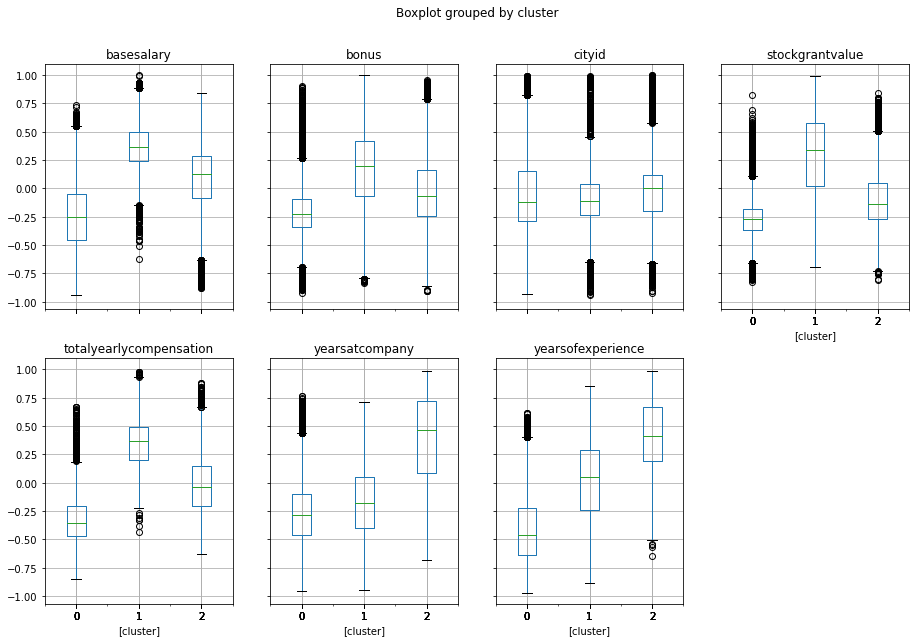

In [28]:
X_scaled_clustered.boxplot(by="cluster", figsize=(15,10), layout=(2,4))